Epoch 1/50
83/83 - 6s - loss: 0.0042 - 6s/epoch - 66ms/step
Epoch 2/50
83/83 - 1s - loss: 0.0012 - 1s/epoch - 17ms/step
Epoch 3/50
83/83 - 1s - loss: 0.0010 - 1s/epoch - 18ms/step
Epoch 4/50
83/83 - 1s - loss: 8.5266e-04 - 1s/epoch - 17ms/step
Epoch 5/50
83/83 - 1s - loss: 8.1909e-04 - 1s/epoch - 16ms/step
Epoch 6/50
83/83 - 1s - loss: 7.6991e-04 - 1s/epoch - 16ms/step
Epoch 7/50
83/83 - 1s - loss: 6.1678e-04 - 1s/epoch - 17ms/step
Epoch 8/50
83/83 - 1s - loss: 6.2623e-04 - 1s/epoch - 17ms/step
Epoch 9/50
83/83 - 1s - loss: 5.5069e-04 - 1s/epoch - 18ms/step
Epoch 10/50
83/83 - 2s - loss: 4.6652e-04 - 2s/epoch - 18ms/step
Epoch 11/50
83/83 - 1s - loss: 4.6640e-04 - 1s/epoch - 16ms/step
Epoch 12/50
83/83 - 2s - loss: 4.4964e-04 - 2s/epoch - 20ms/step
Epoch 13/50
83/83 - 2s - loss: 4.1012e-04 - 2s/epoch - 21ms/step
Epoch 14/50
83/83 - 2s - loss: 4.0591e-04 - 2s/epoch - 24ms/step
Epoch 15/50
83/83 - 2s - loss: 3.6286e-04 - 2s/epoch - 22ms/step
Epoch 16/50
83/83 - 2s - loss: 3.4196e-04 - 2s

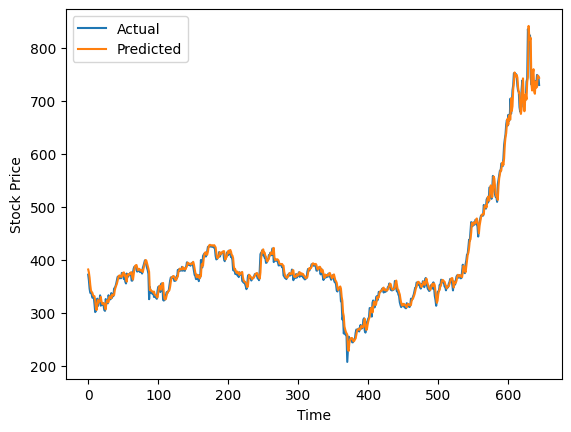

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


data = pd.read_csv('C:/Users/Rajat Shrivastava/Downloads/ADANIPORTS.csv')


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


def create_dataset(dataset, lookback):
    X, Y = [], []
    for i in range(len(dataset) - lookback):
        X.append(dataset[i:(i + lookback), 0])
        Y.append(dataset[i + lookback, 0])
    return np.array(X), np.array(Y)


lookback = 20


train_X, train_Y = create_dataset(train_data, lookback)
test_X, test_Y = create_dataset(test_data, lookback)


train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(train_X, train_Y, epochs=50, batch_size=32, verbose=2)


predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)


plt.plot(data['Close'].values[train_size + lookback:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()